<a href="https://colab.research.google.com/github/HSSunag/Final-Project/blob/master/areca_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [38]:

import numpy
import keras
import os
import tensorflow as tf


def images_to_array(dataset_dir, image_size):
    dataset_array = []
    dataset_labels = []

    class_counter = 0

    classes_names = os.listdir(dataset_dir)
    for current_class_name in classes_names:
        class_dir = os.path.join(dataset_dir, current_class_name)
        images_in_class = os.listdir(class_dir)

        print("Class index", class_counter, ", ", current_class_name, ":" , len(images_in_class))

        for image_file in images_in_class:
            if image_file.endswith(".jpg"):
              image_file_dir = os.path.join(class_dir, image_file)

              img = keras.preprocessing.image.load_img(image_file_dir, target_size=(image_size, image_size))
              img_array = keras.preprocessing.image.img_to_array(img)

              img_array = img_array/255.0

              dataset_array.append(img_array)
              dataset_labels.append(class_counter)
        class_counter = class_counter + 1
    dataset_array = numpy.array(dataset_array)
    dataset_labels = numpy.array(dataset_labels)
    return dataset_array, dataset_labels



train_dir = "drive/My Drive/Final Datasets"
image_size = 32
train_dataset_array, train_dataset_array_labels = images_to_array(dataset_dir=train_dir, image_size=image_size)
print("Training Data Array Shape :", train_dataset_array.shape)
numpy.save("train_dataset_array.npy", train_dataset_array)
numpy.save("train_dataset_array_labels.npy", train_dataset_array_labels)

'''test_dir = "drive/My Drive/DataSet/Testing/test"
test_dataset_array, test_dataset_array_labels = images_to_array(dataset_dir=test_dir, image_size=image_size)
print("Test Data Array Shape :", test_dataset_array.shape)
numpy.save("test_dataset_array.npy", test_dataset_array)
numpy.save("test_dataset_array_labels.npy", test_dataset_array_labels)'''

Class index 0 ,  Category 1 : 1350
Class index 1 ,  Category 2 : 1125
Class index 2 ,  Category 3 : 1170
Training Data Array Shape : (3645, 32, 32, 3)


'test_dir = "drive/My Drive/DataSet/Testing/test"\ntest_dataset_array, test_dataset_array_labels = images_to_array(dataset_dir=test_dir, image_size=image_size)\nprint("Test Data Array Shape :", test_dataset_array.shape)\nnumpy.save("test_dataset_array.npy", test_dataset_array)\nnumpy.save("test_dataset_array_labels.npy", test_dataset_array_labels)'

In [0]:
from sklearn.utils import shuffle

train_dataset_array, train_dataset_array_labels = shuffle(train_dataset_array, train_dataset_array_labels,random_state=0)

from keras.utils import to_categorical
y_train_one_hot = to_categorical(train_dataset_array_labels)

In [40]:
print(len(train_dataset_array))
print(len(train_dataset_array_labels))

3645
3645


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
model = Sequential()

In [0]:

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32 ,32 ,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
hist = model.fit(train_dataset_array, y_train_one_hot,
           batch_size=10, epochs=10, validation_split=0.10)

Train on 3280 samples, validate on 365 samples
Epoch 1/10
3280/3280 [==============================] - 8s 2ms/step - loss: 1.0350 - accuracy: 0.4567 - val_loss: 0.9721 - val_accuracy: 0.5397
Epoch 2/10
3280/3280 [==============================] - 8s 2ms/step - loss: 0.9112 - accuracy: 0.5677 - val_loss: 0.8674 - val_accuracy: 0.5890
Epoch 3/10
3280/3280 [==============================] - 8s 2ms/step - loss: 0.7447 - accuracy: 0.6793 - val_loss: 0.7602 - val_accuracy: 0.6630
Epoch 4/10
3280/3280 [==============================] - 8s 2ms/step - loss: 0.6084 - accuracy: 0.7381 - val_loss: 0.7293 - val_accuracy: 0.7096
Epoch 5/10
3280/3280 [==============================] - 8s 2ms/step - loss: 0.4971 - accuracy: 0.7909 - val_loss: 0.7221 - val_accuracy: 0.7151
Epoch 6/10
3280/3280 [==============================] - 8s 2ms/step - loss: 0.3874 - accuracy: 0.8457 - val_loss: 0.7615 - val_accuracy: 0.7288
Epoch 7/10
3280/3280 [==============================] - 8s 2ms/step - loss: 0.3010 - accu

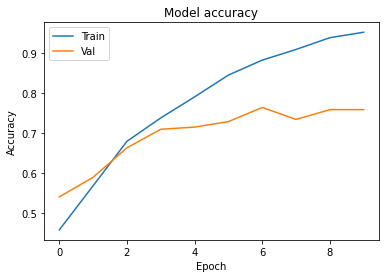

In [65]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [67]:
print(hist.history['accuracy'])

[0.45670733, 0.5676829, 0.6792683, 0.73810977, 0.7908537, 0.84573174, 0.8832317, 0.910061, 0.93963414, 0.95335364]


In [0]:
model.save('areca4.h5')